#  🌳🏡**Tree Coverage in Pittsburgh Neighborhoods**🏡🌲
*Tristan Zuroski*

Pittsburgh is among the top cities in the US for tree canopy percentage, though the actual value of that percentage has fallen since 2014.

"Urban nature" such as tree coverage is demonstrated to have a positive effect on the mental and physical wellbeing, among other benefits, including environmental and financial (Turner-Skoff).

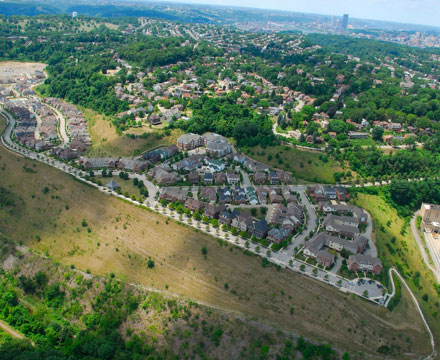

## **Metrics**
Using a dataset of over 45,000 trees monitored and maintained by the City of Pittsburgh Department of Public Works Forestry Division, I will make an assessment of the best neighborhood in Pittsburgh by foliage content and quality. One of the first tasks will be to identify trees that qualify for our metric. For instance, many of the entries are dead trees, stumps, or vacant sites, and therefore should not be counted for the purposes of this interpretation, which is focused on living trees. The dataset also lists a condition for each tree, which will also count for the final quality metric.

In [1]:
import pandas as pd

# Give pandas the dataset
# Import address_number as a string to avoid errors due to inconsistencies in the dataset.
trees = pd.read_csv('data_trees.csv', dtype={'address_number':'str', 'condition':'str'})

# Now we have a dataframe named trees to work with.

trees

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,754166088,7428,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,Well or Pit,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724
1,1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,Open or Unrestricted,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868
2,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45704,39047675,499 N LANG AVE,N LANG AVE,Maple: Norway,Acer platanoides,15.0,15.0,NaN,NaN,NaN,...,Point Breeze North,9.0,14.0,4.200314e+10,2.0,14.0,4.0,3-14,40.453499,-79.901280
45705,1827907131,NaN,NaN,Maple: Sugar,Acer saccharum,NaN,NaN,NaN,NaN,NaN,...,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.443065,-79.934139
45706,1513723611,NaN,NaN,Maple: Sugar,Acer saccharum,NaN,NaN,NaN,NaN,NaN,...,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.443010,-79.934095
45707,1830872418,NaN,NaN,Maple: Sugar,Acer saccharum,NaN,NaN,NaN,NaN,NaN,...,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.442946,-79.934062


## **Rooting Around**

Before doing anything else, I had to get familiar with the dataframe's size and contents.

Using `trees.shape` reveals the set is 45709 rows by 58 columns. To get a better idea of the kind of information the frame represents, I used `trees.info()`. Most columns in the output aren't relevant, so I took note of the columns I was interested in for my analysis, and omitted the output for legibility by commenting out that code.

Most important are the tree's **neighborhood**, **condition**, and **common name**. The latter can be used to determine if the entry in question is a tree, a stump, or a vacant site.

It would be useful to have a summary of all possible neighborhoods, conditions, and names. With this, it will be easier to analyze and parse the data. To do this, I printed a set of all unique values of each with `trees['COLUMN_NAME'].unique()`. These are also rather lengthy, but the list of conditions is output below as an example.

In [2]:
trees.shape
print()
trees.info()
print()
print('Conditions:' + str(trees['condition'].unique()))
print()
print('Neighborhoods:' + str(trees['neighborhood'].unique()))
print()
print('Tree Types:' + str(trees['common_name'].unique()))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45709 entries, 0 to 45708
Data columns (total 58 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         45709 non-null  int64  
 1   address_number                             38803 non-null  object 
 2   street                                     38867 non-null  object 
 3   common_name                                45606 non-null  object 
 4   scientific_name                            45606 non-null  object 
 5   height                                     41335 non-null  float64
 6   width                                      41300 non-null  float64
 7   growth_space_length                        41515 non-null  float64
 8   growth_space_width                         41517 non-null  float64
 9   growth_space_type                          45516 non-null  object 
 10  diameter_base_height 

## **Pruning the Data**
Because there's so much data, it seems prudent to make a new dataframe that only contains relevant information about living trees.

### **Removing unnecessary columns**

Because most of the columns in the original dataframe are irrelevant to the final analysis, a new dataframe with more relevant data is defined here.

In [3]:
sample = pd.DataFrame({'neighborhood':[],'common_name':[],'condition':[]})
sample['neighborhood'] = trees['neighborhood']
sample['common_name'] = trees['common_name']
sample['condition'] = trees['condition']

### **Including only living trees**
To exclude trees based on several criteria, a query mask is defined for each.

Trees cannot be dead or stumps, and their name cannot contain the word "vacant"

In [8]:
# Condition Query Masks
# Condition should not be NaN
nan_condition_mask = pd.isna(sample['condition'])
nan_condition_mask = ~nan_condition_mask

# Dead trees don't count
dead_condition_mask = sample['condition'] != 'Dead'

# Combine masks
condition_mask = sample [nan_condition_mask & dead_condition_mask]

# Type Query Masks
# Tree cannot have a name that is NaN
nan_type_mask = pd.isna(sample['common_name'])
nan_type_mask = ~nan_type_mask
# Trees cannot have a type of stump
stump_type_mask = sample['common_name'] != 'Stump'
# Tree type cannot contain the word "vacant"
vacant_type_mask = sample['common_name'].str.contains('Vacant').astype(bool)
vacant_type_mask = ~vacant_type_mask
# Combine masks
type_mask = sample[nan_type_mask & stump_type_mask & vacant_type_mask]

living_trees = sample[type_mask.astype(bool) & condition_mask.astype(bool)]

living_trees.value_counts()

ltf = living_trees.value_counts().to_frame()

ltf2 = ltf.groupby(by = 'condition', sort = True)

## **Which Neighborhood is the best Neighborhood?**

Based on the science, it's clear that more trees is better. It's time to determine which neighborhood has the most trees. Additionally, in the final plot, neighborhoods with a proportionally high quantity of high quality trees are colored green, so the viewer can get a better idea of very good neighborhoods.

In [5]:
#First, make a new dataframe with a count of total trees per neighborhood.
neighborhood_trees = living_trees['neighborhood'].value_counts()

#Then, make a new dataframe that contains only good or better trees.
#loop over a series to determine:
#Quantity of trees good or better per neighborhood
#Percentage of total trees good or better per neighborhood
#Color Blue or Green representing this percentage per neighborhood


def color(pct):
    
    if(pct >= 50):
        return 'green'
    else: return 'blue'

hoods = neighborhood_trees.index

hood_by_tgb = {'hood':[],'tgb':[],'pct':[],'color':[]}

for h in hoods:
    mask = living_trees['neighborhood'] == h
    subset = living_trees[mask]
    
    good_mask = subset['condition'] == "Good"
    very_good_mask = subset['condition'] == "Very Good" 
    excellent_mask = subset['condition'] == "Excellent"
    
    #make we have a list of trees good or better in the current neighborhood
    tgb = subset[good_mask | very_good_mask | excellent_mask]
    
    hood_by_tgb['hood'].append(h)
    size = len(tgb.index)
    hood_by_tgb['tgb'].append(size)
    
    #crunch the percentage tgb - this will be used to lerp the color for the bar graph.
    quotient = size / neighborhood_trees[h]
    
    pct = quotient * 100
    
    hood_by_tgb['pct'].append(round(pct,2))
    hood_by_tgb['color'].append(color(pct))

,Neighborhood,Total trees,Trees w/ Condition Good or Better,Percentage of trees Good or Better
0,Squirrel Hill South,4805,2057,42.81
1,Highland Park,2680,1138,42.46
2,Squirrel Hill North,1861,691,37.13
3,South Side Flats,1433,910,63.50
4,Shadyside,1279,334,26.11
5,East Liberty,1220,486,39.84
6,Bloomfield,1154,562,48.70
7,Point Breeze,1150,353,30.70
8,Central Business District,879,482,54.84
9,Perry North,871,218,25.03


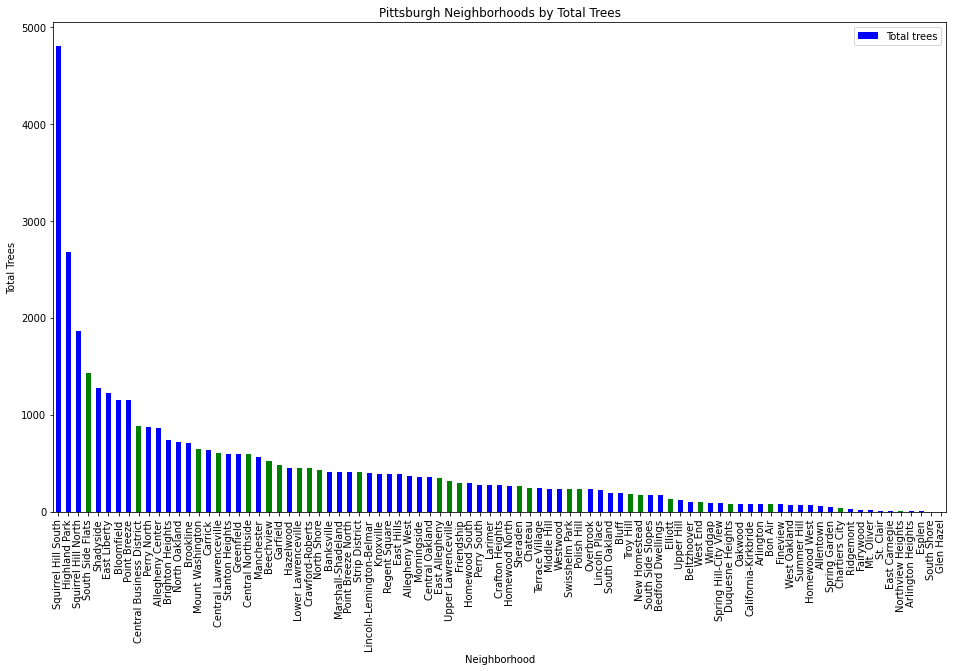

In [6]:
finaldf = pd.DataFrame({
    'Neighborhood' : neighborhood_trees.index,
    'Total trees' : neighborhood_trees.values,
    'Trees w/ Condition Good or Better' : hood_by_tgb['tgb'],
    'Percentage of trees Good or Better' :hood_by_tgb['pct']
})

plot = finaldf.plot

plot.bar(
    'Neighborhood', 
    'Total trees', 
    ylabel = 'Total Trees',
    color = hood_by_tgb['color'],
    grid = False,
    figsize = (16,9),
    title = 'Pittsburgh Neighborhoods by Total Trees',
)
# Neighborhoods in which half or more of all trees are "good or better" are green
finaldf.head(10)

# The Final Count

With a huge quantity of trees in Squirrel Hill South, at a fairly high quality of roughly 43% good or better trees, Squirrel Hill South has to win the best neighborhood in terms of tree quantity. Surely the arbor has a huge beneficial effect on those who live within in its leafy domain.

Special mention goes to the South Side Flats fot having the most trees of any neighborhood in which more than half the trees are in good condition or better.

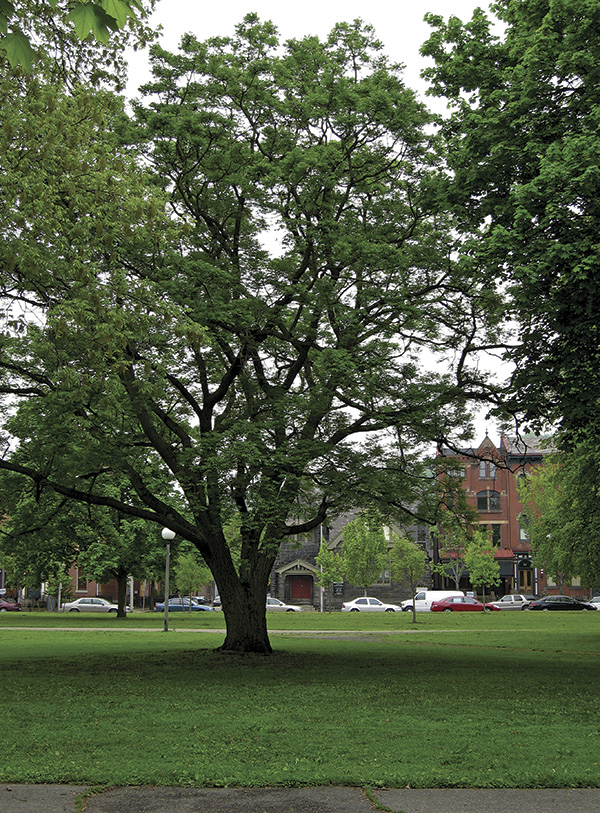

# Works Cited
Turner-Skoff, Jessica B. “The Benefits of Trees for Livable and Sustainable Communities.” *PLANTS, PEOPLE, PLANET*, vol. 1, no. 4, 2019, https://doi.org/ https://doi.org/10.1002/ppp3.39. 